<a href="https://colab.research.google.com/github/ParthikB/Neural-Style-Transfer/blob/v0.0/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras.backend as K
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.models import Model

import matplotlib.pyplot as plt
import cv2
import numpy as np

In [0]:
base_model.summary()

### Importing VGG19 Model

In [101]:
base_model = VGG19(weights='imagenet')
# base_model.summary()

model = Model(input=base_model.input, output=base_model.get_layer("block4_conv2").output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  after removing the cwd from sys.path.


### Importing required Images

In [0]:
def generateNoiseImage(contentImage, NOISE_RATIO = 0.97):
  (height, width, channels) = contentImage.shape
  img = np.random.uniform(-20, 20, (height, width, channels)).astype('float32')

  noiseImg = (img * NOISE_RATIO) + (contentImage * (1-NOISE_RATIO))

  return noiseImg

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


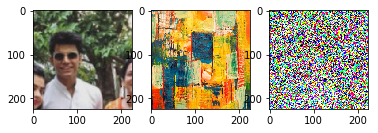

In [106]:
shape = (224, 224, 3)
(height, width, channels) = shape

# Content Image
contentImage = plt.imread("/content/drive/My Drive/Colab Notebooks/Neural Style Transfer/images/content1.jpg")
contentImage = cv2.resize(contentImage, (height, width))
# (height, width, channels) = contentImage.shape

# Style Image
styleImage = plt.imread("/content/drive/My Drive/Colab Notebooks/Neural Style Transfer/images/style1.jpg")
styleImage = cv2.resize(styleImage, (height, width)) # Reshaping style Image as Content Image

# Generate Image
generateImage = generateNoiseImage(contentImage)
# plt.imshow(generateImage)

f, axarr = plt.subplots(1,3)
axarr[0].imshow(contentImage)
axarr[1].imshow(styleImage)
axarr[2].imshow(generateImage)


### Finding the Activation Values

In [104]:
# Content Image Activation Value    // aC
aC = model[contentImage]

TypeError: ignored

### Creating Cost Functions

In [0]:
# Content Cost Function
def contentCost(contentActivation, generatedActivation):
  return 0.5 * K.sum((contentActivation + generatedActivation)**2)

# Gram Matrix
def gramMatrix(x):
  return x * K.transpose(x)

# Style Cost
def styleCost(styleActivation, generatedActivation, generatedImage):
  height, width, channels = generatedImage.shape
  styleActivation     = gramMatrix(styleActivation)
  generatedActivation = gramMatrix(generatedActivation)

  return K.sum(styleActivation + generatedActivation) / (2*height*width*channels)**2

def totalCost(contentCost, styleCost, ALPHA=10, BETA=40):
  return ALPHA*contentCost + BETA*styleCost